#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [1]:
from google.colab import files
upload = files.upload()

Saving imdb_top_10000.txt to imdb_top_10000.txt


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("imdb_top_10000.txt", sep = "\t", names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'])
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [3]:
df.isnull().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [4]:
df[df.genres.isna() == True]

imdbID             title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

In [5]:
df.shape

(10000, 7)

In [6]:
df.dropna(subset = ['genres'], inplace=True)
df.shape

(9999, 7)

In [7]:
df.isnull().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

## 2. Asking Questions

Determining the best book base on score

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [8]:
df.dtypes


imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [9]:
run_time = [int(r.split(' ')[0]) for r in df.runtime]
df['runtime'] = run_time
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [10]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [14]:
genre = df.genres[0]
genre

'Crime|Drama'

In [15]:
genre_set=set()
for genre in df.genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
len(genre_set)

24

In [16]:
#to add columns
for genre in genre_set:
    df[genre] = [genre in row.split("|") for row in df.genres]
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Action  Adult  Adventure  ...  Musical  \
0                       Crime|Drama   False  False      False  ...    False   
1                    Crime|Thriller   False  False      False  ...    False   
2            Drama|Mystery|Thriller   False  False      False  ...    False   
3           Action|Adventure|Sci-Fi    True  False       True  ...    False   
4  Action|Adventure|Sci-Fi|Thriller    True  False       True  ...    False   

   Mystery   News  Reality-TV  Romance  Sci-Fi  Sport  Thriller    War  \
0    False  False       False    False   False  False     False  False   
1    False  False       False    False   False  False      True  False   
2     True  False       False    False   False  False      True  False   
3    False  False       False    False    True  False     False  False   
4    False  False       False    False    True  False      True  False   

   Western  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 31 columns]

In [17]:
df.drop(["genres"],axis=1, inplace=True)

In [18]:
df['title'] = [titles[0:-7] for titles in df.title]
df.head()

imdbID                     title  year  score   votes  runtime  Action  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   False   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   False   
2  tt0137523                Fight Club  1999    8.8  458173      139   False   
3  tt0133093                The Matrix  1999    8.7  448114      136    True   
4  tt1375666                 Inception  2010    8.9  385149      148    True   

   Adult  Adventure  Animation  ...  Musical  Mystery   News  Reality-TV  \
0  False      False      False  ...    False    False  False       False   
1  False      False      False  ...    False    False  False       False   
2  False      False      False  ...    False     True  False       False   
3  False       True      False  ...    False    False  False       False   
4  False       True      False  ...    False    False  False       False   

   Romance  Sci-Fi  Sport  Thriller    War  Western  
0    False   False  False     False  False    False  
1    False   False  False      True  False    False  
2    False   False  False      True  False    False  
3    False    True  False     False  False    False  
4    False    True  False      True  False    False  

[5 rows x 30 columns]

## 4. EDA

In [19]:
#Graphs
df.describe()

year        score          votes      runtime
count  9999.000000  9999.000000    9999.000000  9999.000000
mean   1993.471447     6.385989   16605.462946   103.580358
std      14.830049     1.189965   34564.883945    26.629310
min    1950.000000     1.500000    1356.000000     0.000000
25%    1986.000000     5.700000    2334.500000    93.000000
50%    1998.000000     6.600000    4981.000000   102.000000
75%    2005.000000     7.200000   15278.500000   115.000000
max    2011.000000     9.200000  619479.000000   450.000000

Text(0, 0.5, 'Number of movies')

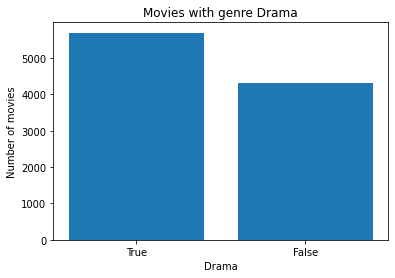

In [20]:
x=['True', 'False']
y=df.Drama.value_counts()
plt.bar(x,y)
plt.title("Movies with genre Drama")
plt.xlabel("Drama")
plt.ylabel("Number of movies")

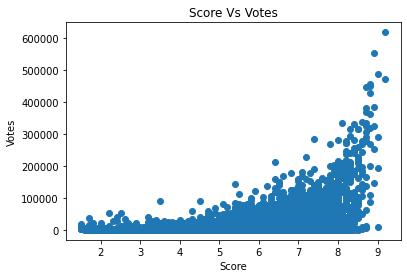

In [21]:
plt.scatter(df.score,df.votes)
plt.title("Score Vs Votes")
plt.xlabel("Score")
plt.ylabel("Votes")
plt.show()

## 5. Determining Best Movies

In [22]:
#Group Properties 
yeardf = df.groupby('year', sort=False)
yeardf


In [23]:
yeardf.size()

year
1994    235
1999    297
2010    315
2009    417
1993    219
       ... 
1961     43
1951     32
1953     47
1956     46
1955     53
Length: 62, dtype: int64

In [24]:
yeardf.first()

imdbID                     title  score   votes  runtime  Action  \
year                                                                        
1994  tt0111161  The Shawshank Redemption    9.2  619479      142   False   
1999  tt0137523                Fight Club    8.8  458173      139   False   
2010  tt1375666                 Inception    8.9  385149      148    True   
2009  tt0499549                    Avatar    8.1  336855      162    True   
1993  tt0108052          Schindler's List    8.9  325888      195   False   
...         ...                       ...    ...     ...      ...     ...   
1961  tt0054698    Breakfast at Tiffany's    7.8   42114      115   False   
1951  tt0044079      Strangers on a Train    8.3   40104      101   False   
1953  tt0046250             Roman Holiday    8.1   36760      118   False   
1956  tt0049730             The Searchers    8.1   32502      119   False   
1955  tt0048545     Rebel Without a Cause    7.9   30491      111   False   

      Adult  Adventure  Animation  Biography  ...  Musical  Mystery   News  \
year                                          ...                            
1994  False      False      False      False  ...    False    False  False   
1999  False      False      False      False  ...    False     True  False   
2010  False       True      False      False  ...    False    False  False   
2009  False       True      False      False  ...    False    False  False   
1993  False      False      False       True  ...    False    False  False   
...     ...        ...        ...        ...  ...      ...      ...    ...   
1961  False      False      False      False  ...    False    False  False   
1951  False      False      False      False  ...    False     True  False   
1953  False      False      False      False  ...    False    False  False   
1956  False       True      False      False  ...    False    False  False   
1955  False      False      False      False  ...    False    False  False   

      Reality-TV  Romance  Sci-Fi  Sport  Thriller    War  Western  
year                                                                
1994       False    False   False  False     False  False    False  
1999       False    False   False  False      True  False    False  
2010       False    False    True  False      True  False    False  
2009       False    False    True  False     False  False    False  
1993       False    False   False  False     False   True    False  
...          ...      ...     ...    ...       ...    ...      ...  
1961       False     True   False  False     False  False    False  
1951       False     True   False  False      True  False    False  
1953       False     True   False  False     False  False    False  
1956       False    False   False  False     False  False     True  
1955       False     True   False  False     False  False    False  

[62 rows x 29 columns]

In [25]:
yeardf.last()

imdbID                 title  score  votes  runtime  Action  Adult  \
year                                                                          
1994  tt0110064         House Party 3    3.1   1357      100   False  False   
1999  tt0152836                  Taal    6.5   1356      179   False  False   
2010  tt1629391        Tere Bin Laden    7.2   1357       95   False  False   
2009  tt1281374             Don McKay    6.0   1363       87   False  False   
1993  tt0110222  Kabhi Haan Kabhi Naa    7.6   1374      158   False  False   
...         ...                   ...    ...    ...      ...     ...    ...   
1961  tt0055320              Il Posto    8.1   1379       93   False  False   
1951  tt0043643     His Kind of Woman    7.2   1474      120   False  False   
1953  tt0046000                  Lili    7.2   1376       81   False  False   
1956  tt0048937   Alexander the Great    5.9   1363      141   False  False   
1955  tt0048198        I Live in Fear    7.3   1360      103   False  False   

      Adventure  Animation  Biography  ...  Musical  Mystery   News  \
year                                   ...                            
1994      False      False      False  ...    False    False  False   
1999      False      False      False  ...     True    False  False   
2010      False      False      False  ...    False    False  False   
2009      False      False      False  ...    False     True  False   
1993      False      False      False  ...    False    False  False   
...         ...        ...        ...  ...      ...      ...    ...   
1961      False      False      False  ...    False    False  False   
1951      False      False      False  ...    False    False  False   
1953      False      False      False  ...     True    False  False   
1956      False      False       True  ...    False    False  False   
1955      False      False      False  ...    False    False  False   

      Reality-TV  Romance  Sci-Fi  Sport  Thriller    War  Western  
year                                                                
1994       False     True   False  False     False  False    False  
1999       False     True   False  False     False  False    False  
2010       False    False   False  False     False  False    False  
2009       False    False   False  False      True  False    False  
1993       False     True   False  False     False  False    False  
...          ...      ...     ...    ...       ...    ...      ...  
1961       False    False   False  False     False  False    False  
1951       False    False   False  False      True  False    False  
1953       False     True   False  False     False  False    False  
1956       False    False   False  False     False  False    False  
1955       False    False   False  False     False  False    False  

[62 rows x 29 columns]

In [26]:
yeardf.groups

{1994: [0, 1, 5, 21, 74, 248, 267, 310, 326, 345, 348, 388, 400, 477, 564, 730, 845, 910, 1016, 1159, 1296, 1373, 1414, 1456, 1467, 1476, 1480, 1610, 1718, 1724, 1758, 1847, 1876, 1881, 1981, 1986, 1999, 2038, 2071, 2072, 2106, 2117, 2190, 2196, 2225, 2284, 2297, 2355, 2404, 2425, 2446, 2461, 2500, 2531, 2586, 2702, 2744, 2762, 2962, 2966, 2994, 3030, 3110, 3136, 3212, 3226, 3252, 3253, 3311, 3385, 3406, 3440, 3473, 3481, 3487, 3538, 3558, 3592, 3598, 3615, 3684, 3708, 3711, 3762, 3778, 3815, 3817, 3909, 3926, 3970, 3999, 4013, 4042, 4043, 4047, 4051, 4104, 4112, 4199, 4227, ...], 1999: [2, 3, 6, 15, 22, 77, 150, 154, 190, 193, 197, 216, 219, 250, 264, 289, 320, 349, 378, 448, 449, 451, 462, 479, 525, 551, 601, 648, 650, 657, 658, 703, 710, 712, 725, 735, 761, 775, 793, 831, 885, 889, 966, 969, 973, 1010, 1011, 1013, 1047, 1055, 1060, 1063, 1153, 1187, 1202, 1207, 1217, 1252, 1255, 1263, 1272, 1281, 1293, 1336, 1343, 1365, 1432, 1455, 1519, 1564, 1582, 1643, 1647, 1651, 1832, 1844, 186

In [27]:
yeardf.get_group(2010).head()

imdbID           title  year  score   votes  runtime  Action  Adult  \
4    tt1375666       Inception  2010    8.9  385149      148    True  False   
100  tt1130884  Shutter Island  2010    8.0  171493      138   False  False   
117  tt0947798      Black Swan  2010    8.3  150346      108   False  False   
122  tt0435761     Toy Story 3  2010    8.6  144200      103   False  False   
145  tt1250777        Kick-Ass  2010    8.0  146535      117    True  False   

     Adventure  Animation  ...  Musical  Mystery   News  Reality-TV  Romance  \
4         True      False  ...    False    False  False       False    False   
100      False      False  ...    False     True  False       False    False   
117      False      False  ...    False     True  False       False    False   
122       True       True  ...    False    False  False       False    False   
145       True      False  ...    False    False  False       False    False   

     Sci-Fi  Sport  Thriller    War  Western  
4      True  False      True  False    False  
100   False  False      True  False    False  
117   False  False      True  False    False  
122   False  False     False  False    False  
145   False  False     False  False    False  

[5 rows x 30 columns]

In [28]:
yeardf.max()

imdbID                                    title  score   votes  \
year                                                                      
1994  tt0145529  Yrrol - En kolossalt genomt\xe4nkt film    9.2  619479   
1999  tt0289424                                 eXistenZ    8.8  458173   
2010  tt1740707                                   Zero 2    8.9  385149   
2009  tt1569364                                  [Rec] 2    8.4  336855   
1993  tt0115819               Wrestling Ernest Hemingway    8.9  325888   
...         ...                                      ...    ...     ...   
1961  tt0055913                                  Yojimbo    8.4   42114   
1951  tt0044876                      When Worlds Collide    8.3   40104   
1953  tt0047677                                   Ugetsu    8.3   36760   
1956  tt0197521                      Written on the Wind    8.2   32502   
1955  tt0049674                          We're No Angels    8.3   30491   

      runtime  Action  Adult  Adventure  Animation  Biography  ...  Musical  \
year                                                           ...            
1994      450    True  False       True       True       True  ...     True   
1999      189    True   True       True       True       True  ...     True   
2010      179    True   True       True       True       True  ...     True   
2009      170    True  False       True       True       True  ...     True   
1993      261    True  False       True       True       True  ...     True   
...       ...     ...    ...        ...        ...        ...  ...      ...   
1961      186    True  False       True       True       True  ...     True   
1951      171    True  False       True       True       True  ...     True   
1953      136    True  False       True       True       True  ...     True   
1956      220    True  False       True      False       True  ...     True   
1955      181    True  False       True       True       True  ...     True   

      Mystery   News  Reality-TV  Romance  Sci-Fi  Sport  Thriller   War  \
year                                                                       
1994     True  False       False     True    True   True      True  True   
1999     True  False       False     True    True   True      True  True   
2010     True   True       False     True    True   True      True  True   
2009     True  False       False     True    True   True      True  True   
1993     True  False       False     True    True   True      True  True   
...       ...    ...         ...      ...     ...    ...       ...   ...   
1961     True  False       False     True    True   True      True  True   
1951     True  False       False     True    True   True      True  True   
1953     True  False       False     True    True  False      True  True   
1956     True  False       False     True    True   True      True  True   
1955     True  False       False     True    True  False      True  True   

      Western  
year           
1994     True  
1999     True  
2010     True  
2009    False  
1993     True  
...       ...  
1961     True  
1951    False  
1953     True  
1956     True  
1955     True  

[62 rows x 29 columns]

In [29]:
yeardf.min()

imdbID                               title  score  votes  runtime  \
year                                                                         
1994  tt0106339                  3 Ninjas Kick Back    2.0   1357        0   
1999  tt0118665          10 Things I Hate About You    2.2   1356        0   
2010  tt0398286                      'Tamara Drewe'    2.2   1357        0   
2009  tt0327597                (500) Days of Summer    1.5   1363        0   
1993  tt0103743                        A Bronx Tale    2.4   1374        0   
...         ...                                 ...    ...    ...      ...   
1961  tt0054130                 A Raisin in the Sun    1.7   1379        0   
1951  tt0042619                   A Christmas Carol    6.2   1474       69   
1953  tt0044953      Abbott and Costello Go to Mars    2.9   1376        0   
1956  tt0047892            ...And God Created Woman    3.1   1363        0   
1955  tt0046889  Abbott and Costello Meet the Mummy    3.7   1360        0   

      Action  Adult  Adventure  Animation  Biography  ...  Musical  Mystery  \
year                                                  ...                     
1994   False  False      False      False      False  ...    False    False   
1999   False  False      False      False      False  ...    False    False   
2010   False  False      False      False      False  ...    False    False   
2009   False  False      False      False      False  ...    False    False   
1993   False  False      False      False      False  ...    False    False   
...      ...    ...        ...        ...        ...  ...      ...      ...   
1961   False  False      False      False      False  ...    False    False   
1951   False  False      False      False      False  ...    False    False   
1953   False  False      False      False      False  ...    False    False   
1956   False  False      False      False      False  ...    False    False   
1955   False  False      False      False      False  ...    False    False   

       News  Reality-TV  Romance  Sci-Fi  Sport  Thriller    War  Western  
year                                                                       
1994  False       False    False   False  False     False  False    False  
1999  False       False    False   False  False     False  False    False  
2010  False       False    False   False  False     False  False    False  
2009  False       False    False   False  False     False  False    False  
1993  False       False    False   False  False     False  False    False  
...     ...         ...      ...     ...    ...       ...    ...      ...  
1961  False       False    False   False  False     False  False    False  
1951  False       False    False   False  False     False  False    False  
1953  False       False    False   False  False     False  False    False  
1956  False       False    False   False  False     False  False    False  
1955  False       False    False   False  False     False  False    False  

[62 rows x 29 columns]

In [30]:
yeardf.mean()

score         votes     runtime    Action     Adult  Adventure  \
year                                                                      
1994  6.081277  19507.868085  106.689362  0.212766  0.000000   0.144681   
1999  6.306734  24169.387205  106.501684  0.154882  0.003367   0.094276   
2010  6.340635  19286.180952  103.034921  0.247619  0.003175   0.139683   
2009  6.287290  18519.033573  100.158273  0.201439  0.000000   0.115108   
1993  6.173516  14785.292237  107.292237  0.232877  0.000000   0.105023   
...        ...           ...         ...       ...       ...        ...   
1961  7.195349   7551.651163  106.418605  0.093023  0.000000   0.139535   
1951  7.478125   8543.812500  102.750000  0.093750  0.000000   0.093750   
1953  7.106383   6196.127660   94.212766  0.085106  0.000000   0.085106   
1956  7.139130   5904.108696  111.913043  0.108696  0.000000   0.173913   
1955  7.250943   6196.584906  103.264151  0.056604  0.000000   0.056604   

      Animation  Biography    Comedy     Crime  ...   Musical   Mystery  \
year                                            ...                       
1994   0.038298   0.055319  0.544681  0.174468  ...  0.012766  0.089362   
1999   0.030303   0.033670  0.457912  0.178451  ...  0.013468  0.114478   
2010   0.038095   0.041270  0.390476  0.149206  ...  0.006349  0.095238   
2009   0.045564   0.047962  0.371703  0.196643  ...  0.011990  0.122302   
1993   0.018265   0.050228  0.406393  0.210046  ...  0.009132  0.091324   
...         ...        ...       ...       ...  ...       ...       ...   
1961   0.023256   0.069767  0.279070  0.116279  ...  0.069767  0.046512   
1951   0.031250   0.031250  0.218750  0.156250  ...  0.125000  0.062500   
1953   0.021277   0.021277  0.276596  0.106383  ...  0.106383  0.085106   
1956   0.000000   0.108696  0.108696  0.086957  ...  0.086957  0.065217   
1955   0.018868   0.094340  0.207547  0.188679  ...  0.056604  0.113208   

          News  Reality-TV   Romance    Sci-Fi     Sport  Thriller       War  \
year                                                                           
1994  0.000000         0.0  0.255319  0.059574  0.051064  0.229787  0.021277   
1999  0.000000         0.0  0.279461  0.070707  0.023569  0.282828  0.050505   
2010  0.003175         0.0  0.196825  0.060317  0.015873  0.339683  0.028571   
2009  0.000000         0.0  0.196643  0.115108  0.021583  0.376499  0.031175   
1993  0.000000         0.0  0.283105  0.068493  0.031963  0.283105  0.031963   
...        ...         ...       ...       ...       ...       ...       ...   
1961  0.000000         0.0  0.302326  0.139535  0.046512  0.093023  0.046512   
1951  0.000000         0.0  0.343750  0.156250  0.031250  0.093750  0.156250   
1953  0.000000         0.0  0.361702  0.148936  0.000000  0.212766  0.085106   
1956  0.000000         0.0  0.239130  0.086957  0.043478  0.130435  0.195652   
1955  0.000000         0.0  0.301887  0.113208  0.000000  0.226415  0.113208   

       Western  
year            
1994  0.029787  
1999  0.013468  
2010  0.022222  
2009  0.000000  
1993  0.022831  
...        ...  
1961  0.093023  
1951  0.000000  
1953  0.085106  
1956  0.130435  
1955  0.056604  

[62 rows x 27 columns]

In [31]:
#applying methods to particular rows
yeardf['score'].mean()

year
1994    6.081277
1999    6.306734
2010    6.340635
2009    6.287290
1993    6.173516
          ...   
1961    7.195349
1951    7.478125
1953    7.106383
1956    7.139130
1955    7.250943
Name: score, Length: 62, dtype: float64

In [32]:
for key, valdf in yeardf:
    result = valdf[valdf['score'] == valdf.score.max()]
    print(result.title, result.year, result.score)

0    The Shawshank Redemption
Name: title, dtype: object 0    1994
Name: year, dtype: int64 0    9.2
Name: score, dtype: float64
2    Fight Club
Name: title, dtype: object 2    1999
Name: year, dtype: int64 2    8.8
Name: score, dtype: float64
4    Inception
Name: title, dtype: object 4    2010
Name: year, dtype: int64 4    8.9
Name: score, dtype: float64
23    Inglourious Basterds
Name: title, dtype: object 23    2009
Name: year, dtype: int64 23    8.4
Name: score, dtype: float64
8    Schindler's List
Name: title, dtype: object 8    1993
Name: year, dtype: int64 8    8.9
Name: score, dtype: float64
9    Star Wars: Episode V - The Empire Strikes Back
Name: title, dtype: object 9    1980
Name: year, dtype: int64 9    8.8
Name: score, dtype: float64
2678    My Father and My Son
Name: title, dtype: object 2678    2005
Name: year, dtype: int64 2678    8.7
Name: score, dtype: float64
11    The Usual Suspects
31                 Se7en
Name: title, dtype: object 11    1995
31    1995
Name: yea

In [33]:
df[df.score == df.score.max()][['title', 'year', 'score']]

title  year  score
0   The Shawshank Redemption  1994    9.2
26             The Godfather  1972    9.2

## 6. Trends in Popularity of Genres

In [34]:
genredf = df[list(genre_set)]
genredf.shape

(9999, 24)

In [35]:
genredf.sum()

Thriller      2832
Comedy        3922
Action        1891
Biography      394
History        358
Western        235
Sci-Fi         897
Romance       2441
News             1
Adventure     1313
Sport          288
War            512
Adult            9
Musical        260
Animation      314
Family         754
Film-Noir       40
Reality-TV       1
Horror        1215
Fantasy        916
Crime         1867
Mystery       1009
Drama         5697
Music          371
dtype: int64

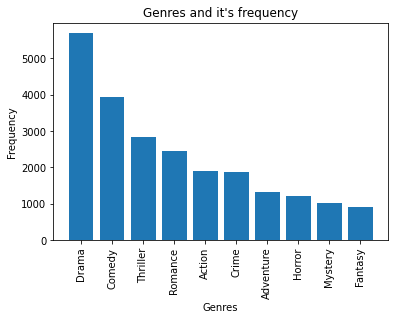

In [36]:
result = genredf.sum()
result = result.sort_values(ascending=False)

x = result.index[:10]
y = result[:10]
plt.bar(x,y)
plt.title("Genres and it's frequency")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()